In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cosine
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import re
import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
df = pd.read_excel("cloth.xlsx")
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df['Class Name'] = df['Class Name'].fillna(value=df['Class Name'].mode()[0])
df['Department Name'] = df['Department Name'].fillna(value=df['Department Name'].mode()[0])
df['Division Name'] = df['Division Name'].fillna(value=df['Division Name'].mode()[0])

In [ ]:
total_depart_name=df['Department Name'].unique()
total_depart_name

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend'],
      dtype=object)

In [ ]:
total_divi_name=df['Division Name'].unique()
total_divi_name

array(['Initmates', 'General', 'General Petite'], dtype=object)

In [ ]:
total_class_name=df['Class Name'].unique()
total_class_name

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', 'Chemises'], dtype=object)

In [ ]:

len(total_class_name)

20

In [ ]:
df1 = df[['Review Text','Rating','Clothing ID']]
df1 = df1.dropna()
df1

,Review Text,Rating,Clothing ID
0,Absolutely wonderful - silky and sexy and comf...,4,767
1,Love this dress! it's sooo pretty. i happene...,5,1080
2,I had such high hopes for this dress and reall...,3,1077
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1049
4,This shirt is very flattering to all due to th...,5,847
...,...,...,...
23481,I was very happy to snag this dress at such a ...,5,1104
23482,"It reminds me of maternity clothes. soft, stre...",3,862
23483,"This fit well, but the top was very see throug...",3,1104
23484,I bought this dress for a wedding i have this ...,3,1084


In [ ]:
count = df.groupby("Clothing ID", as_index=False).count()
mean = df.groupby("Clothing ID", as_index=False).mean()
dfMerged = pd.merge(df, count, how='right', on=['Clothing ID'])
dfMerged

,Clothing ID,Age_x,Title_x,Review Text_x,Rating_x,Recommended IND_x,Positive Feedback Count_x,Division Name_x,Department Name_x,Class Name_x,Age_y,Title_y,Review Text_y,Rating_y,Recommended IND_y,Positive Feedback Count_y,Division Name_y,Department Name_y,Class Name_y
0,0,26,NaN,NaN,5,1,0,General,Jackets,Outerwear,1,0,0,1,1,1,1,1,1
1,1,50,Love this under-all cami tank ?,Originally i bought this in black and white. r...,5,1,0,Initmates,Intimate,Layering,3,3,3,3,3,3,3,3,3
2,1,36,Staple tank!,Love this tank. material and fit are great. lo...,5,1,0,Initmates,Intimate,Layering,3,3,3,3,3,3,3,3,3
3,1,24,Love but also very annoying,"I love this tank, it is so comfortable but it ...",2,0,1,Initmates,Intimate,Layering,3,3,3,3,3,3,3,3,3
4,2,28,"Gorgeous top, straps way too long",I just adore this top! it is so comfy and styl...,4,1,0,General,Tops,Knits,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1203,34,NaN,NaN,4,1,0,Initmates,Intimate,Layering,11,7,7,11,11,11,11,11,11
23482,1204,39,Comfy and cute pants,I love these pants. i have them in navy and ca...,5,1,3,General Petite,Bottoms,Pants,2,2,2,2,2,2,2,2,2
23483,1204,39,Very comfortable/relaxed,These are super soft and relaxed. i have them ...,4,1,0,General Petite,Bottoms,Pants,2,2,2,2,2,2,2,2,2
23484,1205,69,NaN,Just received my second pair of pilcro in the ...,5,1,0,General,Bottoms,Pants,2,1,2,2,2,2,2,2,2


In [ ]:
dfProductReview = df.groupby("Clothing ID", as_index=False).mean()
dfProductReview.head(3)

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
0,0,26.000000,5.0,1.000000,0.000000
1,1,36.666667,4.0,0.666667,0.333333
2,2,28.000000,4.0,1.000000,0.000000


In [ ]:


ProductReviewSummary = df1.groupby("Clothing ID")["Review Text"].apply(str)
p = ProductReviewSummary.to_frame()
p['Review Text'] = p['Review Text'].str.replace('\d+'," ")
p['Review Text'] = p['Review Text'].str.replace('\n'," ")
p['Review Text'] = p['Review Text'].str.strip(" ")
p.shape[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


1179

In [ ]:
p['Review Text'] = p['Review Text'].str.replace('@user',' ')
p['Review Text'] = p['Review Text'].str.replace('#',' ')
p['Review Text'] = p['Review Text'].str.replace("[^0-9a-zA-Z#]",' ')
p

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,Review Text
Clothing ID,
1,Originally i bought this in black and white r...
2,I just adore this top it is so comfy and styl...
3,I love this sweater definite classic i get l...
4,This sweater is so comfy and classic it bala...
5,I m currently on the prowl for the other color...
...,...
1200,Bought this dress without trying it on but lis...
1202,The colors are amazing so vibrant and plentif...
1203,This is a great layering tank that is super co...


In [ ]:
df.isna().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64

,Class Name,Rating
1,Dresses,6333
4,Knits,4843
3,Blouses,3097
7,Sweaters,1428
2,Pants,1388
14,Jeans,1147
9,Fine gauge,1100
8,Skirts,945
11,Jackets,704
6,Lounge,691


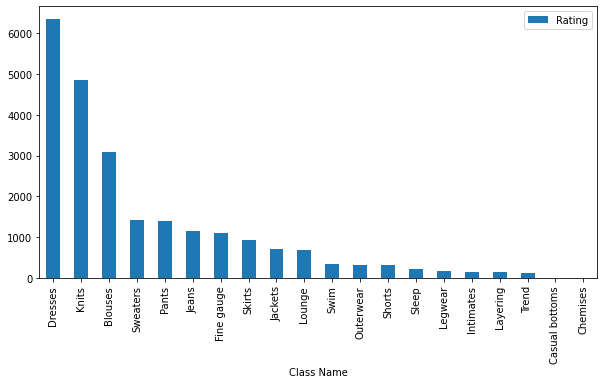

In [ ]:
df1 = (df[df['Rating']=='5'])
data=[]
for i in df['Class Name'].unique():
  data.append([i,len(df[df['Class Name']==i])])



data=pd.DataFrame(data,columns=['Class Name','Rating'])
data = data.sort_values(by='Rating',ascending=False)
data.plot(x='Class Name',y='Rating',kind='bar',figsize=(10,5))

data

In [ ]:
#most no of rating using customer id
data3 =[]
for 	dress in df['Clothing ID'].unique():
  data3.append([dress,len(df[df['Clothing ID']==	dress])])



data3=pd.DataFrame(data,columns=['Clothing ID','Class Name'])
data3 = data.sort_values(by='Class Name',ascending=False)

data3

,Class Name,Rating
13,Trend,119
12,Swim,350
7,Sweaters,1428
10,Sleep,228
8,Skirts,945
16,Shorts,317
2,Pants,1388
5,Outerwear,328
6,Lounge,691
15,Legwear,165


**VISUALIZE THE DATA **

In [ ]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23486 non-null  object
 8   Department Name          23486 non-null  object
 9   Class Name               23486 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [ ]:
df.isna().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64

In [ ]:
df.shape

(23486, 10)

In [ ]:
import missingno as msno

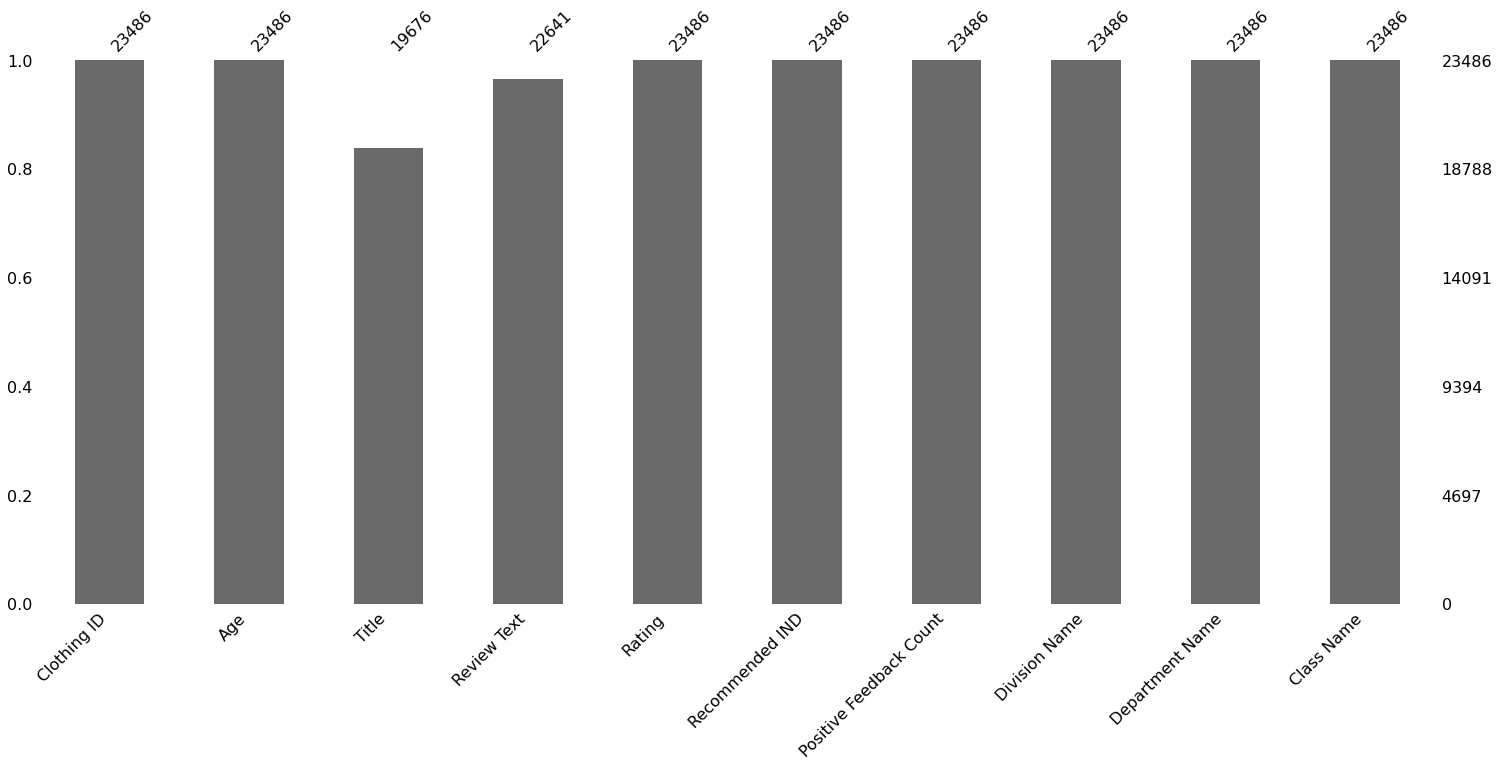

In [ ]:
msno.bar(df)

In [ ]:
df['Class Name'] = df['Class Name'].fillna(value=df['Class Name'].mode()[0])
df['Department Name'] = df['Department Name'].fillna(value=df['Department Name'].mode()[0])
df['Division Name'] = df['Division Name'].fillna(value=df['Division Name'].mode()[0])

In [ ]:
df.isna().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64

In [ ]:
df2 = df[['Review Text','Title']]
df2 = df2.dropna()
df2

,Review Text,Title
2,I had such high hopes for this dress and reall...,Some major design flaws
3,"I love, love, love this jumpsuit. it's fun, fl...",My favorite buy!
4,This shirt is very flattering to all due to th...,Flattering shirt
5,"I love tracy reese dresses, but this one is no...",Not for the very petite
6,I aded this in my basket at hte last mintue to...,Cagrcoal shimmer fun
...,...,...
23481,I was very happy to snag this dress at such a ...,Great dress for many occasions
23482,"It reminds me of maternity clothes. soft, stre...",Wish it was made of cotton
23483,"This fit well, but the top was very see throug...","Cute, but see through"
23484,I bought this dress for a wedding i have this ...,"Very cute dress, perfect for summer parties an..."


In [ ]:
df2.isna().sum()

Review Text    0
Title          0
dtype: int64

In [ ]:
import seaborn as sns

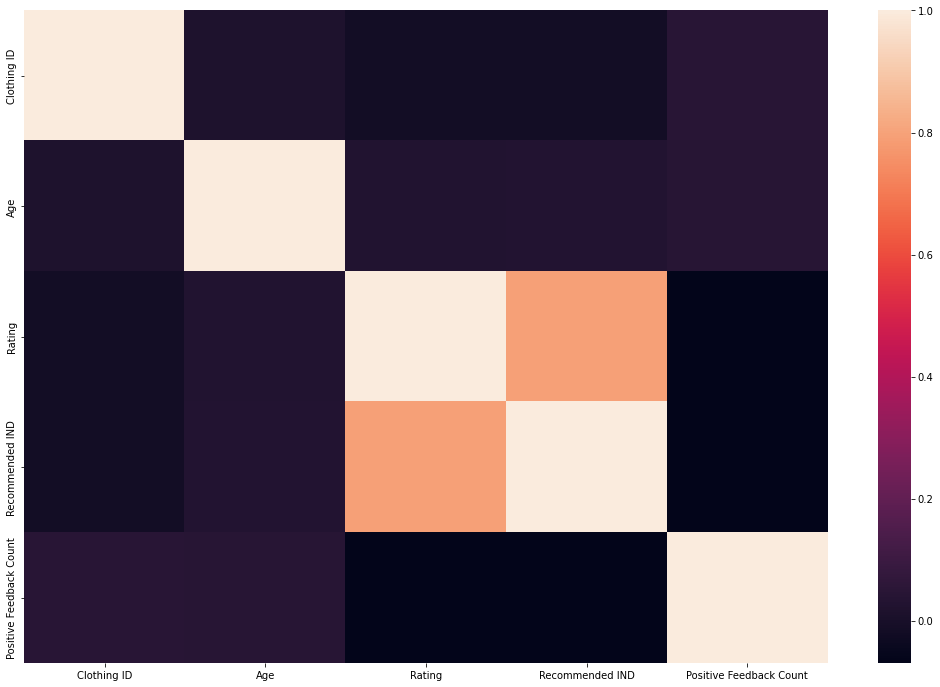

In [ ]:
plt.figure(figsize=(18,12))
corr=df.corr()
sns.heatmap(data=corr,annot=False,fmt='.2g')



In [ ]:
X=df.iloc[:,:2]
Y=df.iloc[:,5]

In [ ]:
X_train, X_test,Y_train,Y_train  = train_test_split(
    X,Y, test_size=0.25, random_state=0)

In [ ]:
X_test

,Clothing ID,Age
12906,984,57
22440,872,60
13965,862,35
14369,829,45
505,833,56
...,...,...
16989,993,47
20718,873,48
20670,927,46
16594,836,42


In [ ]:
X_train

,Clothing ID,Age
2774,864,46
22308,1077,32
3197,909,41
6999,641,52
18561,1080,44
...,...,...
13123,1094,28
19648,237,38
9845,1078,41
10799,1104,44


In [ ]:
Y_train

12906    1
22440    1
13965    1
14369    1
505      1
        ..
16989    1
20718    0
20670    0
16594    1
8315     1
Name: Recommended IND, Length: 5872, dtype: int64